In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_curve,auc,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# 加载数据集
train_data = pd.read_excel('/content/drive/MyDrive/churn_training_scale.xlsx')
test_data= pd.read_excel('/content/drive/MyDrive/churn_test_scale.xlsx')

X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]
X_test=test_data.iloc[:,:-1]
y_test=test_data.iloc[:,-1]

In [ ]:

# 激活函数：'identity', 'logistic', 'relu', 'softmax', 'tanh'
# 优化算法：lbfgs, sgd, adam。默认adam适用于较大的数据集，lbfgs适用于较小的数据集。
parameters=dict(hidden_layer_sizes=[10,50,100,150],
        activation=['identity','logistic','relu','tanh'],
        learning_rate_init=[0.1,0.01,0.001,0.0001],
        )

clf = MLPClassifier(random_state=1)
grid = GridSearchCV(clf, parameters, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(grid.best_params_) #{'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.1}

In [ ]:
y_pred=grid.predict(X_test)

print('准确率:',accuracy_score(y_test,y_pred))
print('精准率:',precision_score(y_test,y_pred))
print('召回率:',recall_score(y_test,y_pred))
print('F1:',f1_score(y_test,y_pred))

准确率: 0.9641819941916747
精准率: 0.5454545454545454
召回率: 0.8372093023255814
F1: 0.6605504587155963


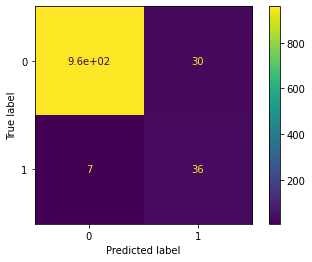

In [ ]:
plot_confusion_matrix(grid,X_test, y_test)

auc(fpr,tpr)： 0.7691078311554009


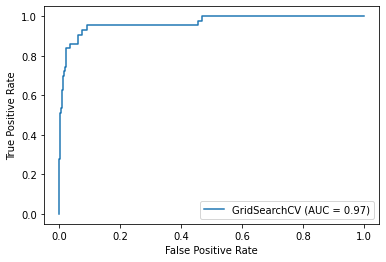

In [ ]:
fpr, tpr, thresholds=roc_curve(grid.predict(X_test),y_test)
plot_roc_curve(grid,X_test,y_test)
print('auc(fpr,tpr)：',auc(fpr,tpr))

In [ ]:
clf = MLPClassifier(activation='tanh',hidden_layer_sizes=140,max_iter=2000)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print('准确率:',accuracy_score(y_test,y_pred))
print('精准率:',precision_score(y_test,y_pred))
print('召回率:',recall_score(y_test,y_pred))
print('F1:',f1_score(y_test,y_pred))

准确率: 0.9370764762826719
精准率: 0.36904761904761907
召回率: 0.7209302325581395
F1: 0.4881889763779528


In [ ]:
print(cross_val_score(clf,X_train,y_train,cv=10,scoring='f1'))

[0.54901961 0.64150943 0.6        0.55555556 0.6122449  0.65384615
 0.68965517 0.54901961 0.56521739 0.55555556]


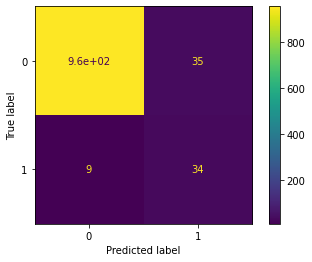

In [ ]:
plot_confusion_matrix(clf,X_test, y_test)

0.7976215738284704


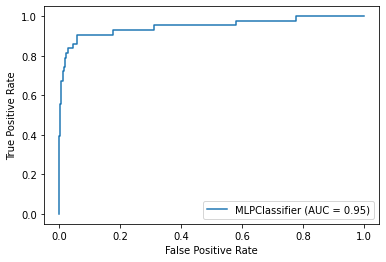

In [ ]:
fpr, tpr, thresholds=roc_curve(clf.predict(X_test),y_test)
plot_roc_curve(clf,X_test,y_test)
print(auc(fpr,tpr))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# o_train_data = pd.read_excel('/content/drive/MyDrive/churn_training.xlsx')
# #except state, area_code, and phone_number
# X=o_train_data.iloc[:,:-1]
# y=o_train_data.iloc[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Don't cheat - fit only on training data
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# # apply same transformation to test data
# X_test = scaler.transform(X_test)

# clf = MLPClassifier()
# #训练模型
# clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))

In [ ]:
clf = MLPClassifier()
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print('准确率:',accuracy_score(y_test,y_pred))
print('精准率:',precision_score(y_test,y_pred))
print('召回率:',recall_score(y_test,y_pred))
print('F1:',f1_score(y_test,y_pred))

准确率: 0.957405614714424
精准率: 0.4931506849315068
召回率: 0.8372093023255814
F1: 0.6206896551724138


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
